In [1]:
from collections import defaultdict
import numpy as np
from tqdm import tqdm
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
import math
import scipy
from functions_for_clustering import *
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from entropy_complexity import entropy_complexity, get_borders

In [2]:
df = pd.read_csv('data/test/part_1.csv')
df.head(-1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,1KN.F,20.0,2020-03-19,0.0,0.096982,0.080357,0.302031,0.290947,0.451661,0.534789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1KN.F,295.0,2021-04-22,1.0,0.933649,0.970444,0.930030,0.908918,0.876949,0.907711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1KR.F,22.0,2020-03-23,0.0,0.156874,0.052010,0.133618,0.098099,0.026216,0.181822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1KR.F,284.0,2021-04-07,1.0,0.947131,0.897271,0.931228,0.896841,0.901139,0.931228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1KR.SG,134.0,2020-09-01,0.0,0.025797,0.065625,0.076034,0.085539,0.109978,0.087349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,CADDKK=X,0.0,2020-02-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,CADDKK=X,116.0,2020-07-31,0.0,0.109641,0.131751,0.120152,0.156760,0.207865,0.219827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11147,CADE,31.0,2020-04-03,0.0,0.045611,0.059295,0.090209,0.096798,0.114535,0.107440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,CADE,267.0,2021-03-12,1.0,0.975990,0.944672,0.884125,0.888823,0.871598,0.846022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
entropy_data = []
for dataset in range(2):
    df = pd.read_csv('data/train/part_%s.csv' % dataset)
    #extracting data
    df_temp = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
    key1 = -40 #the number of ticks we wish to observe - 1
    key2 = min([int(x) for x in df_temp.columns[1:]])
    df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1) #drop all ticks but those we're observing
    df_temp = df_temp.dropna(axis=0) #drop rows with nan
    #     df_temp = df_temp.iloc[]
    clustering_data_trended_temp = df_temp.values.tolist() #convert resulting data to list
    clustering_data_trended = [x[::-1] for x in clustering_data_trended_temp]
    for series in clustering_data_trended:
        entropy_data.append(series)

In [8]:
print(len(entropy_data))

16138


In [7]:
time_series = [
    np.sin(np.arange(0,1000,.01)),
    np.sin(np.arange(0,10000,.01)),
    np.sin(np.arange(0,1000000,.01)),
    np.random.normal(size=1000),
    np.random.normal(size=10000),
    np.random.normal(size=10000000),
]
ts_names = ['Sine, 1000', 'Sine, 10000', 'Sine, 1000000',
            'Gaussian Noise 1000', 'Gaussian Noise 10000', 'Gaussian Noise 10000000']

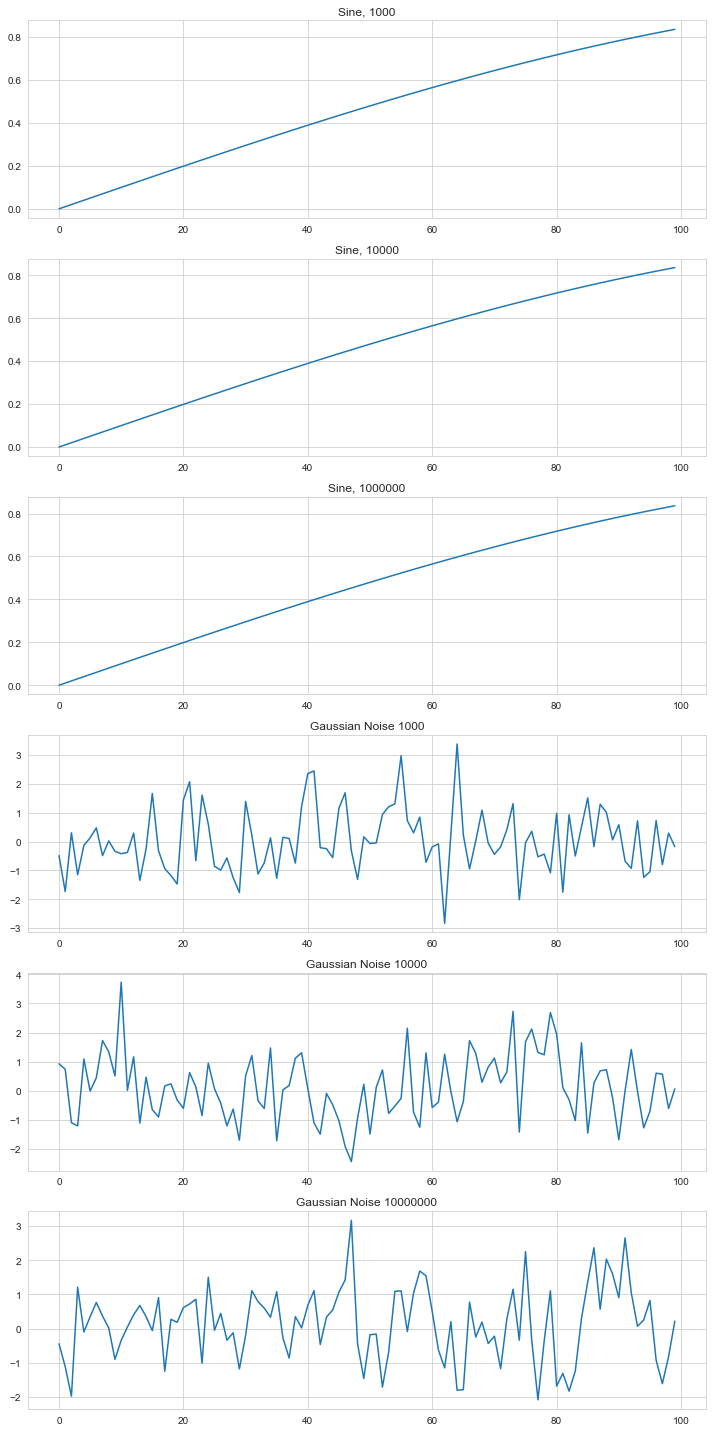

In [8]:
fig, axs = plt.subplots(len(time_series),1, figsize=(10,20))
for ts, ax, label_ in zip(time_series, axs.reshape(-1), ts_names):
    ax.plot(ts[:100])
    ax.set_title(label_)
plt.tight_layout()
plt.show()

In [34]:
N = 5
M = 1

In [35]:
min_ec, max_ec = get_borders(n=N, m=M)

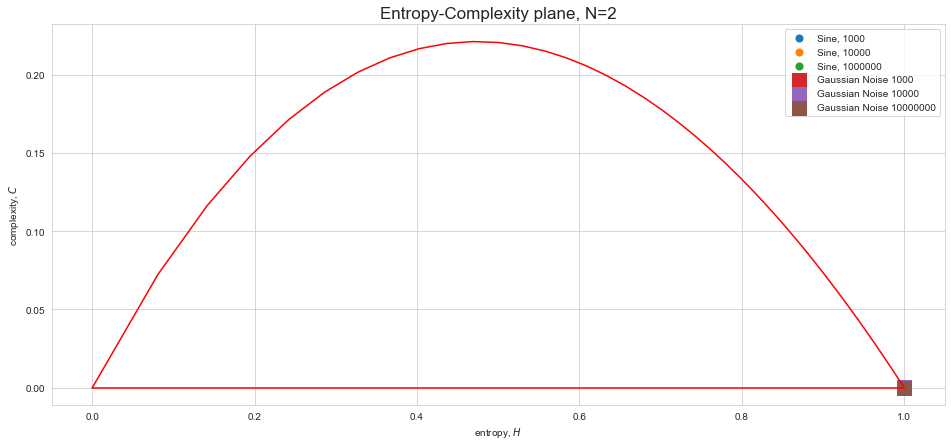

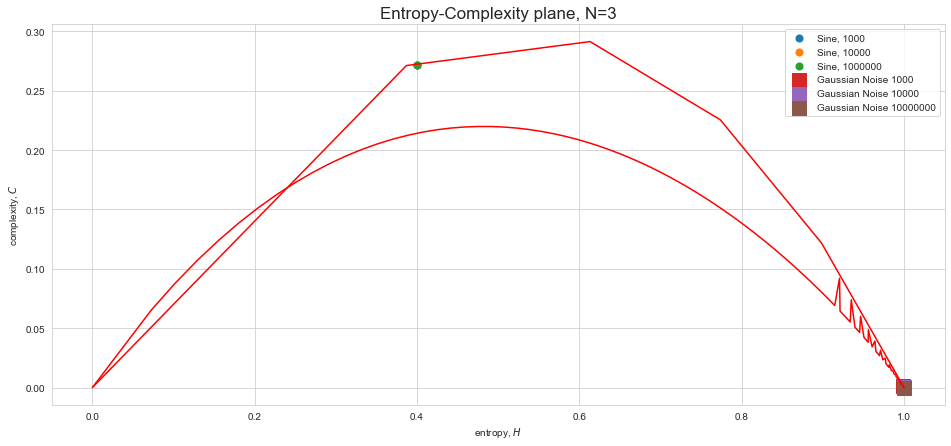

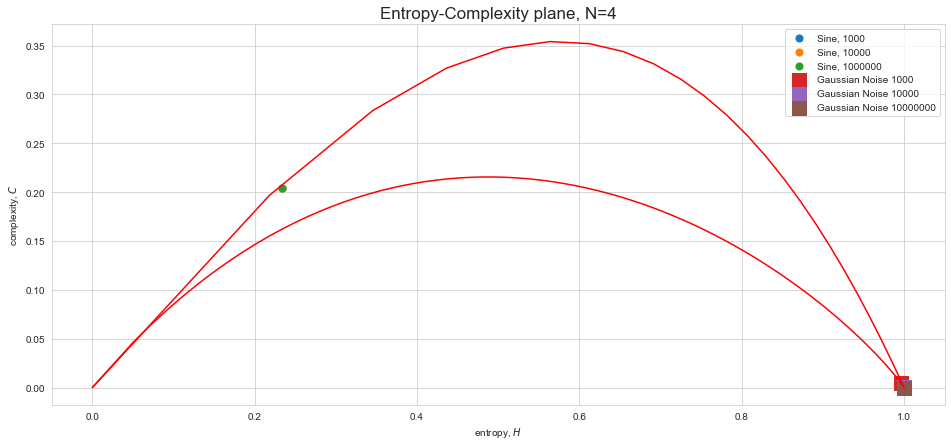

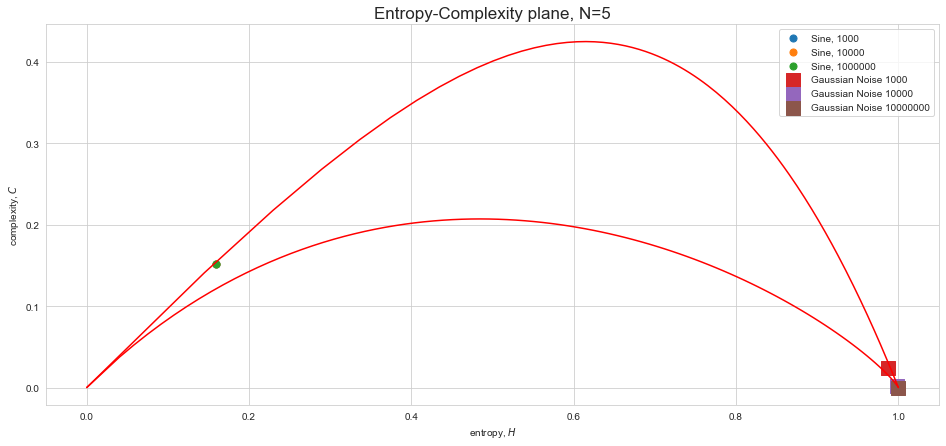

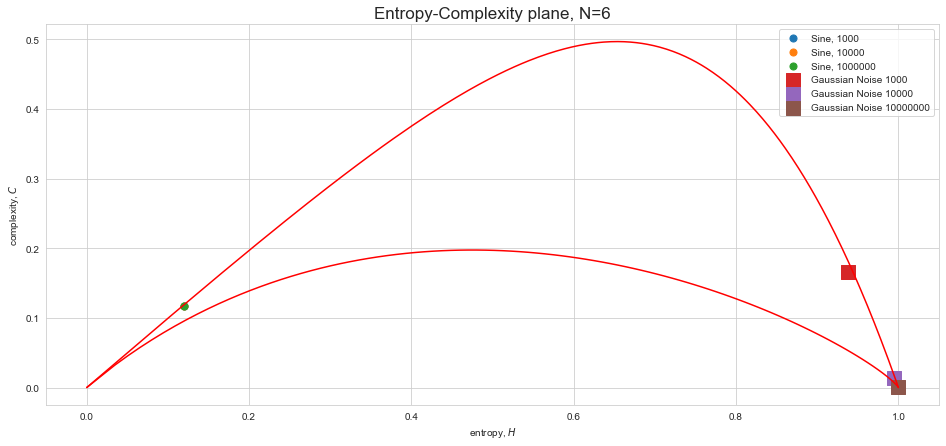

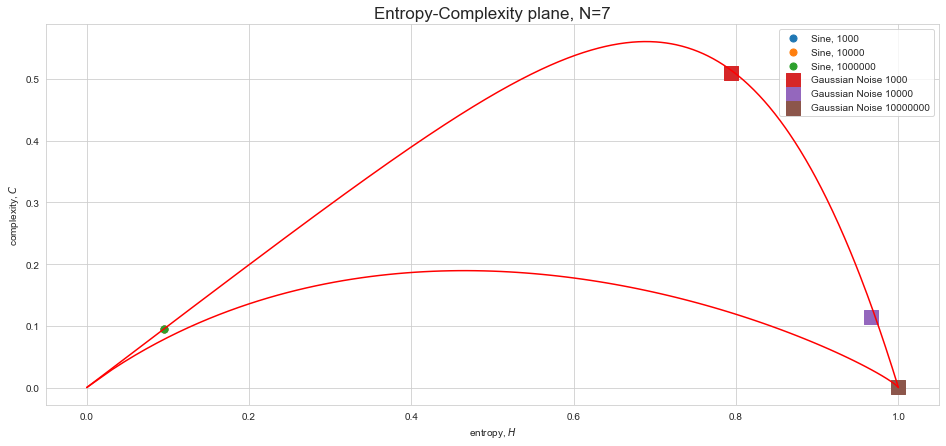

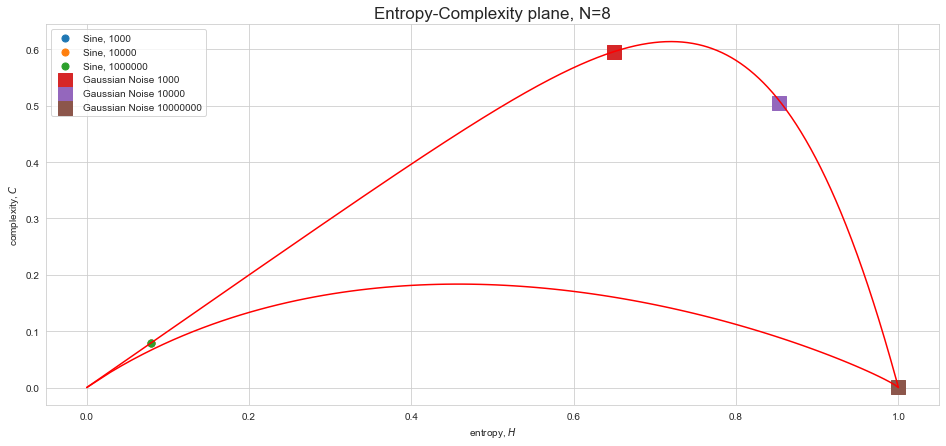

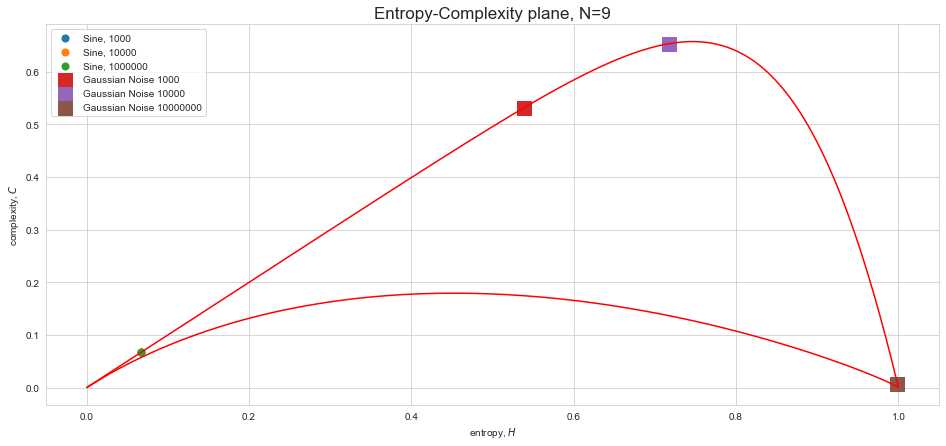

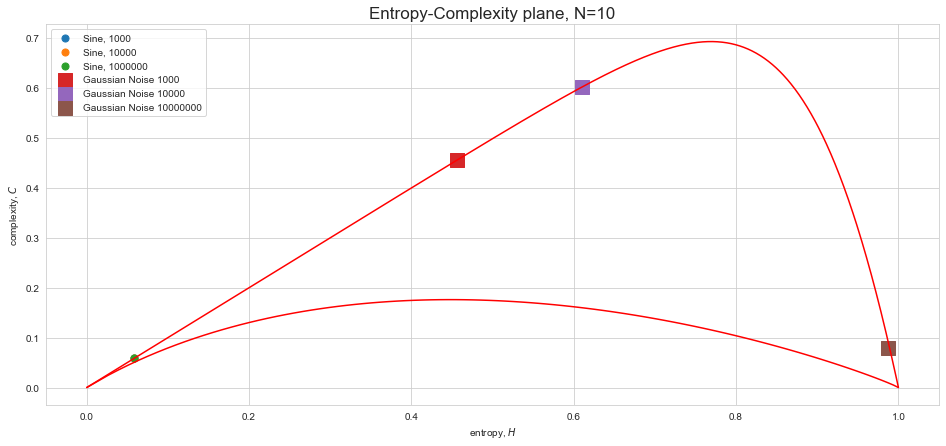

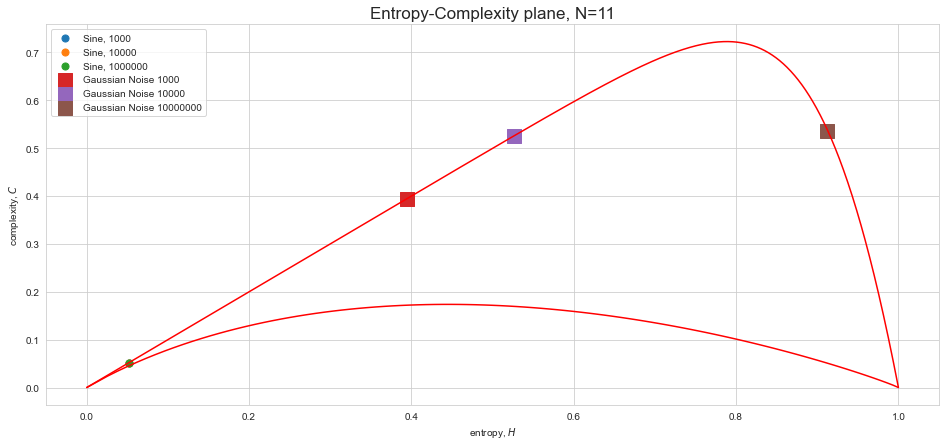

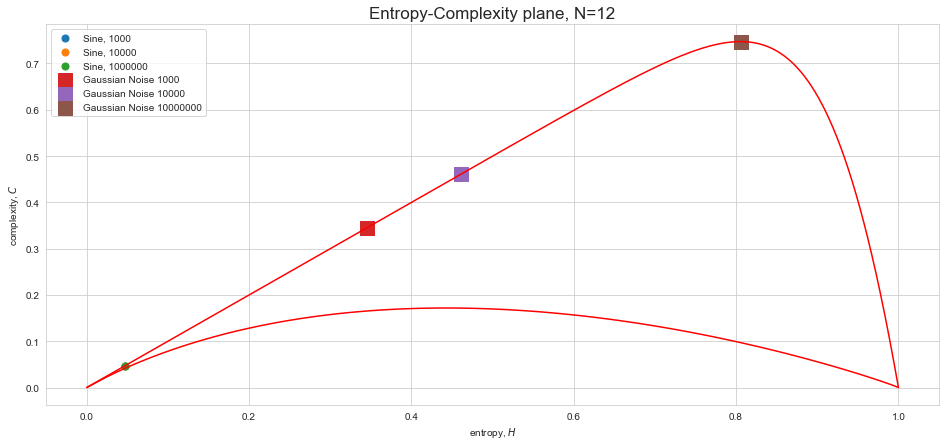

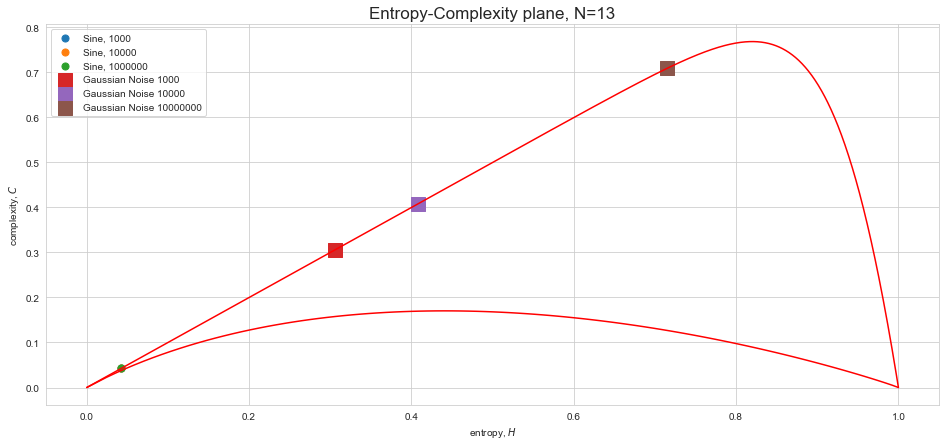

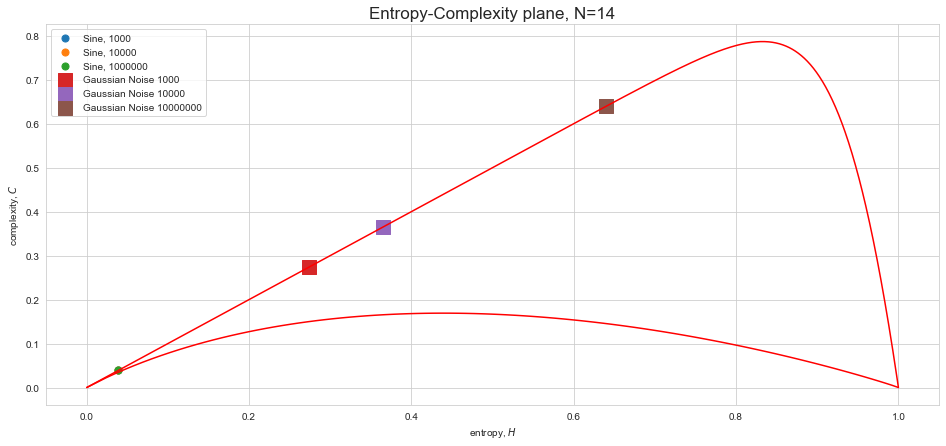

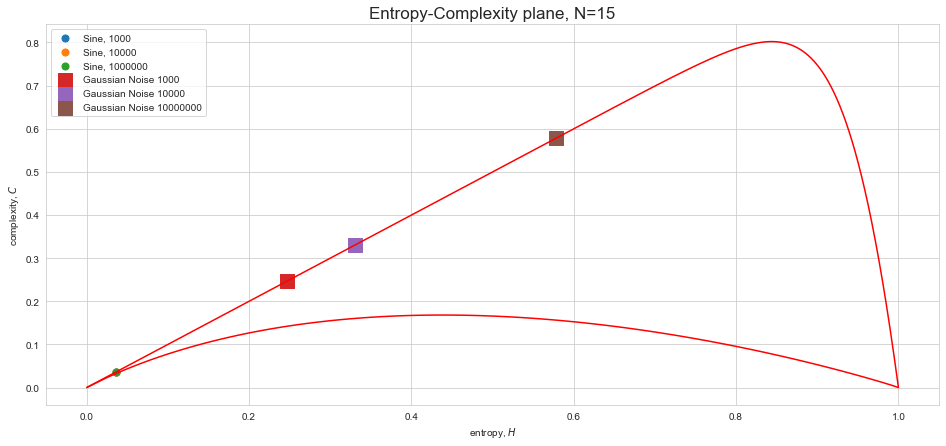

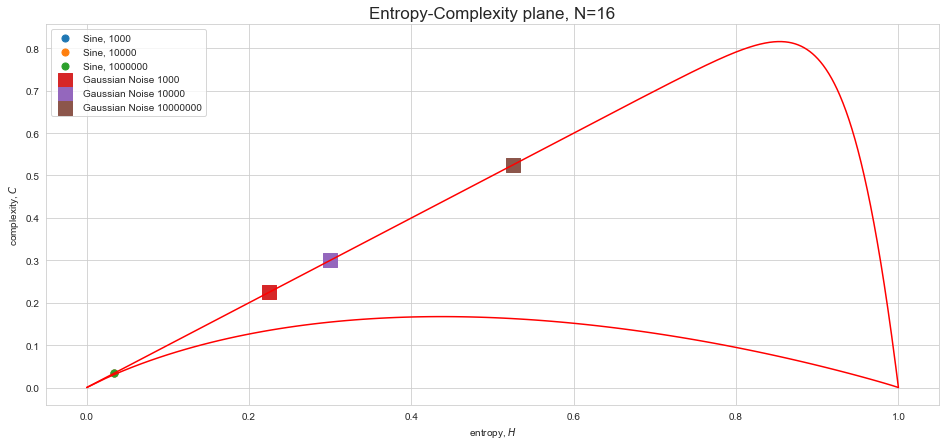

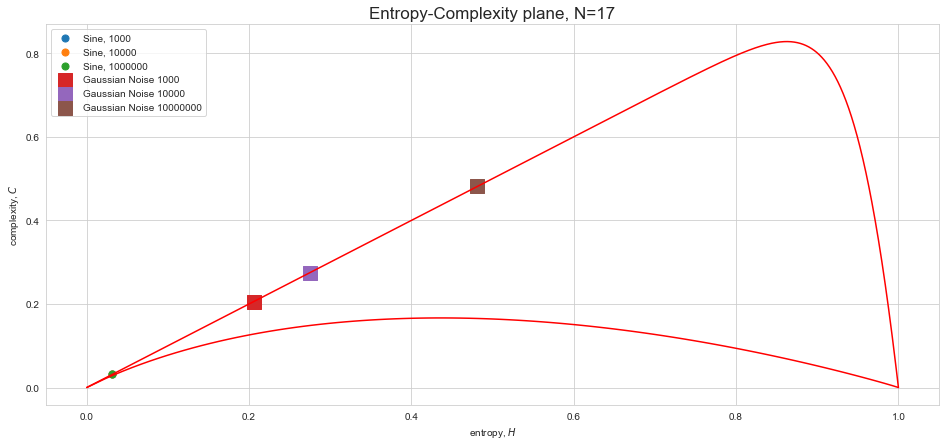

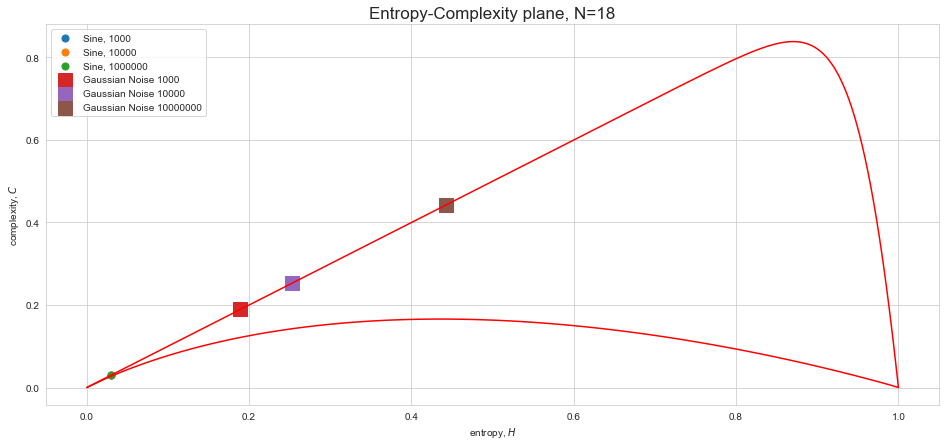

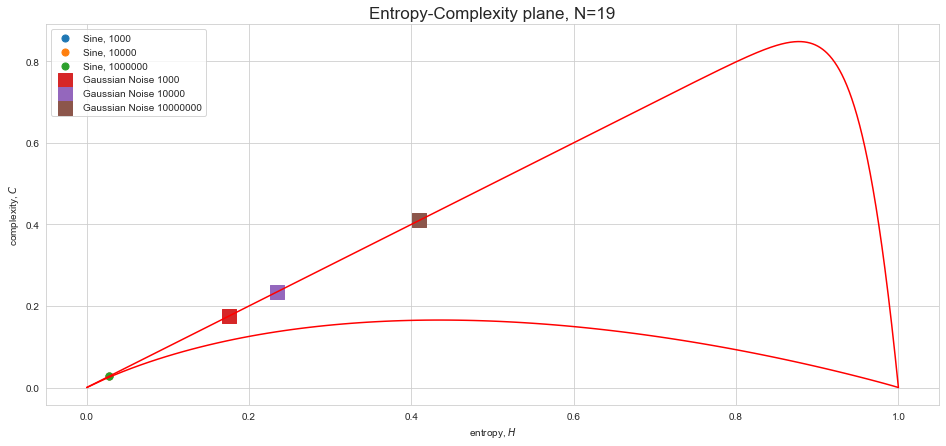

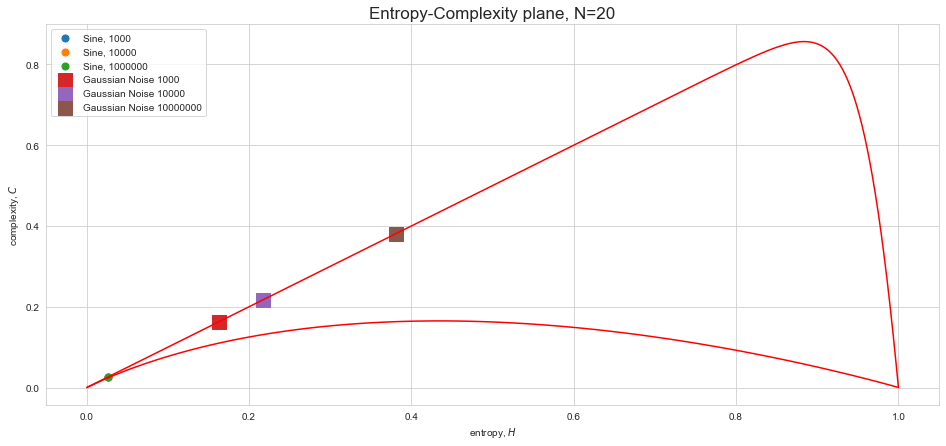

Wall time: 3h 19min 2s


In [9]:
%%time
for N in range(2, 21):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)
    EC = [entropy_complexity(series, n=N, m=M) for series in time_series]
    f, ax = plt.subplots(1,1,figsize=(16, 7))

    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    counter = 0
    for EC_, label_ in zip(EC, ts_names):
        if 0 <= counter <= 2: 
            ax.scatter(*EC_, label=label_, s=200, marker='.')
        else:
            ax.scatter(*EC_, label=label_, s=200, marker='s')

        counter += 1

    # ax.scatter(*EC[-2], label=ts_names[-2], s=200, marker='^')
    # ax.scatter(*EC[-1], label=ts_names[-1], s=200, marker='s')


    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

In [5]:
# plt.figure(figsize=(12, 7))
speed_avg = []
for i in tqdm(range(10)):
    white_noise = np.random.normal(size=100000)
    coord = []
    len_speed = dict()
    dist = []

    for N in range(2, 21):
        coord.append(entropy_complexity(white_noise, n=N, m=1))

    new_coord = np.array(coord)
#     sns.scatterplot(x=new_coord.T[0], y=new_coord.T[1])
#     plt.ylim(-0.1, 1.1)
#     plt.xlim(-0.1, 1.2)
    for i in range(1, new_coord.T.shape[1]):
        dist.append(euclidean(new_coord[i], new_coord[i - 1]))

    speed = np.mean(dist)
    speed_avg.append(speed)
print(np.mean(speed_avg))

100%|██████████| 10/10 [01:42<00:00, 10.28s/it]

0.0774114281442285


In [21]:
white_noise = np.random.normal(size=100000)
coord = []
len_speed = dict()
dist = []

for N in range(2, 21):
    coord.append(entropy_complexity(white_noise, n=N, m=1))

new_coord_noise = np.array(coord)
#     sns.scatterplot(x=new_coord.T[0], y=new_coord.T[1])
#     plt.ylim(-0.1, 1.1)
#     plt.xlim(-0.1, 1.2)
for i in range(1, new_coord.T.shape[1]):
    dist.append(euclidean(new_coord[i], new_coord[i - 1]))

speed = np.mean(dist)

Text(0.5, 1.0, 'Trajectory of Guassian Noise')

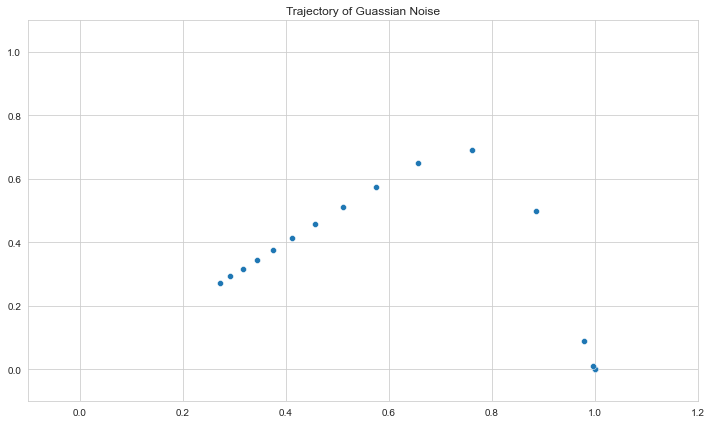

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=new_coord_noise.T[0], y=new_coord_noise.T[1])
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.2)
plt.title("Trajectory of Guassian Noise")


In [3]:
class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    #Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    #RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        #Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        #RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)

            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array

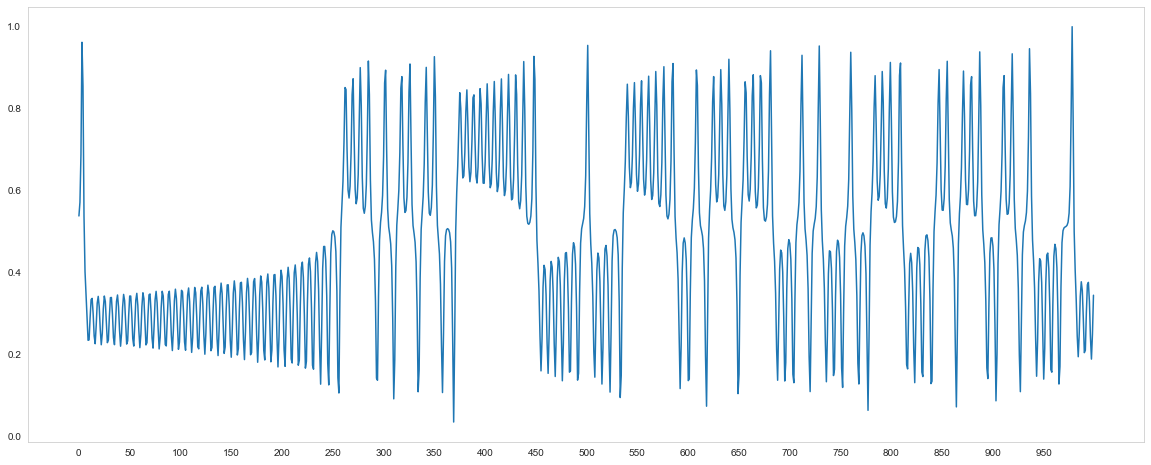

In [11]:
xs, _, _ = Lorentz().generate(0.1, 100000)
xs = (xs - xs.min()) / (xs.max() - xs.min())
plt.figure(figsize=(20, 8))
plt.plot(xs[:1000])
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()

In [24]:
plt.figure(figsize=(12, 7))

coord = []
len_speed = dict()
dist = []

for N in tqdm(range(2, 21)):
    coord.append(entropy_complexity(xs, n=N, m=1))

new_coord = np.array(coord)

for i in range(1, new_coord.T.shape[1]):
    dist.append(euclidean(new_coord[i], new_coord[i - 1]))

speed = np.mean(dist)
print(speed)

100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

0.056782848752910876


<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'Trajectory of Lorenz Series')

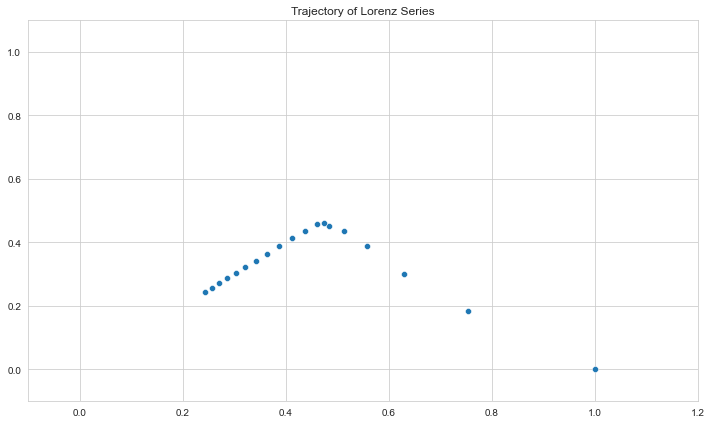

In [25]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=new_coord.T[0], y=new_coord.T[1])
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.2)
plt.title("Trajectory of Lorenz Series")


Text(0.5, 1.0, " 'Comparison' of Lorenz Series vs Gaussian Noise")

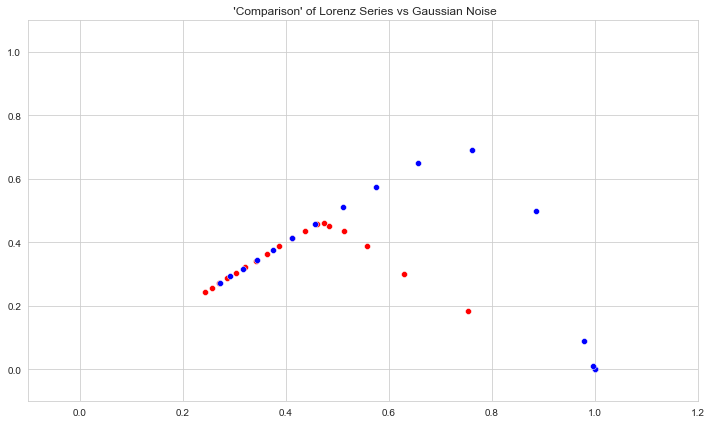

In [26]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=new_coord.T[0], y=new_coord.T[1], color="red")
sns.scatterplot(x=new_coord_noise.T[0], y=new_coord_noise.T[1], color="blue")
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.2)
plt.title(" 'Comparison' of Lorenz Series vs Gaussian Noise")
